<a href="https://colab.research.google.com/github/hjdeck/Cyberbullying-Classification/blob/main/Cyberbullying_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cyberbullying Classification**
#### **Objective**: train 3 classification models for cyberbullying tweet classifcation; report and discuss evaluation results
## **About Dataset**
*cyberbullying_tweets.csv* contains 2 features and 47692 observations
- *tweet_text*: predictor variable
- *cyberbullying_type*: response variable

In [6]:
import pandas as pd
from IPython.display import display

In [7]:
# raw data
tweets = pd.read_csv('cyberbullying_tweets.csv')
display(tweets)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


# **Text Preprocessing**
- normalizing text
- removing unicode characters
- removing stopwords
- stemming/lemmatization


In [8]:
import re
from wordcloud import STOPWORDS

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [9]:
# Text Cleaning
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [10]:
# preprocessed data
tweets['tweet_text'] = tweets['tweet_text'].apply(clean_text)
tweets['tweet_text'] = tweets['tweet_text'].apply(lemmatize_words)
display(tweets)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thank head concern another angry dude tw...,not_cyberbullying
4,isis account pretend kurdish account islam lie,not_cyberbullying
...,...,...
47687,black ppl aren expect anything depend anything...,ethnicity
47688,turner withhold disappointment turner call cou...,ethnicity
47689,swear god dumb nigger bitch get bleach hair re...,ethnicity
47690,yea fuck therealexel youre nigger fuck unfollo...,ethnicity


# **Model Training**
The dataset is split into 70% training and 30% testing. The models considered are:
- Multinomial Naive Bayes
- Random Forest
- Linear Support Vector Machine
- Logistic Regression
- RNN


In [11]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [12]:
# Splitting training/testing data
train_data, test_data = train_test_split(tweets, test_size = 0.3, random_state = 1)

# **Naive Bayes Classifier**
## Optimization
- train on n-grams

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model
MNB_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Trained model on training data
MNB_model.fit(train_data.tweet_text, train_data.cyberbullying_type)

# Predicted labels of test data
MNB_labels = MNB_model.predict(test_data.tweet_text)

# **Random Forest**


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model (n = 10)
RF_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1))

# Trained model on training data
RF_model.fit(train_data.tweet_text, train_data.cyberbullying_type)

# Predicted labels of test data
RF_labels = RF_model.predict(test_data.tweet_text)

# **Linear Support Vector Machine**

In [15]:
from sklearn.linear_model import SGDClassifier

SVM_model = make_pipeline(TfidfVectorizer(), SGDClassifier(loss = 'hinge', random_state = 1, max_iter = 5, tol = None))

SVM_model.fit(train_data.tweet_text, train_data.cyberbullying_type)

SVM_labels = SVM_model.predict(test_data.tweet_text)

# **Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

LR_model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter = 1000))

LR_model.fit(train_data.tweet_text, train_data.cyberbullying_type)

LR_labels = LR_model.predict(test_data.tweet_text)

# **Recurrent Neural Network (RNN)**

# **Model Evaluation**
The following metrics are used to evaluate model performance:
- **Accuracy Score**: proportion of correctly classified instances
- **Precision**: ratio of correct positive predictions to total positive predictions
- **Recall**: ratio of correct positive predictions to all observations in actual class
- **F1**: weighted average of precision & recall
- **ROC-AUC curve**: measure of capability for model to distinguish classes
- **Confusion Matrix**: counts of class confusion by classifier predictions

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [24]:
# classification report
print('Multinomial Naive Bayes')
print(metrics.classification_report(test_data.cyberbullying_type, MNB_labels, 
                                    target_names = tweets['cyberbullying_type'].unique()))

print('\nRandom Forest')
print(metrics.classification_report(test_data.cyberbullying_type, RF_labels, 
                                    target_names = tweets['cyberbullying_type'].unique()))

print('\nLinear Support Vector Machine')
print(metrics.classification_report(test_data.cyberbullying_type, SVM_labels, 
                                    target_names = tweets['cyberbullying_type'].unique()))

print('\nLogistic Regression')
print(metrics.classification_report(test_data.cyberbullying_type, LR_labels, 
                                    target_names = tweets['cyberbullying_type'].unique()))

Multinomial Naive Bayes
                     precision    recall  f1-score   support

  not_cyberbullying       0.67      0.98      0.80      2423
             gender       0.78      0.91      0.84      2350
           religion       0.82      0.84      0.83      2384
other_cyberbullying       0.71      0.31      0.43      2430
                age       0.63      0.42      0.50      2290
          ethnicity       0.80      0.97      0.88      2431

           accuracy                           0.74     14308
          macro avg       0.73      0.74      0.71     14308
       weighted avg       0.73      0.74      0.71     14308


Random Forest
                     precision    recall  f1-score   support

  not_cyberbullying       0.95      0.97      0.96      2423
             gender       0.97      0.97      0.97      2350
           religion       0.87      0.84      0.86      2384
other_cyberbullying       0.52      0.48      0.50      2430
                age       0.50      0.56  

[Text(0.5, 1.0, 'Logistic Regression')]

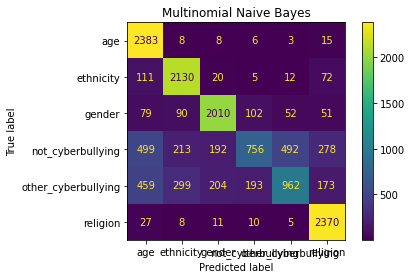

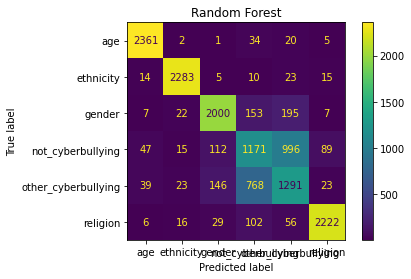

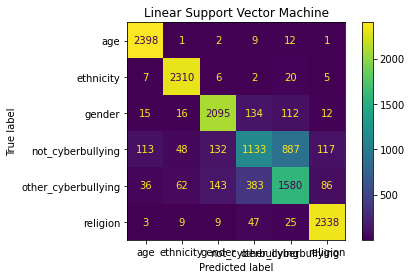

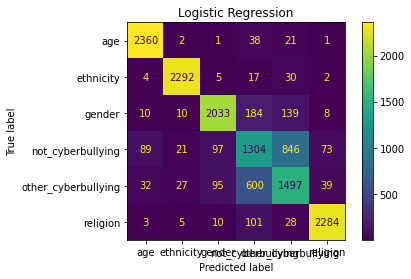

In [32]:
# confusion matrix
MNB_cm = metrics.confusion_matrix(test_data.cyberbullying_type, MNB_labels, labels = MNB_model.classes_)
MNB_cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = MNB_cm, display_labels = MNB_model.classes_)
MNB_cmd.plot()
MNB_cmd.ax_.set(title = 'Multinomial Naive Bayes')

RF_cm = metrics.confusion_matrix(test_data.cyberbullying_type, RF_labels, labels = RF_model.classes_)
RF_cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cm, display_labels = RF_model.classes_)
RF_cmd.plot()
RF_cmd.ax_.set(title = 'Random Forest')

SVM_cm = metrics.confusion_matrix(test_data.cyberbullying_type, SVM_labels, labels = SVM_model.classes_)
SVM_cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = SVM_cm, display_labels = SVM_model.classes_)
SVM_cmd.plot()
SVM_cmd.ax_.set(title = 'Linear Support Vector Machine')

LR_cm = metrics.confusion_matrix(test_data.cyberbullying_type, LR_labels, labels = LR_model.classes_)
LR_cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cm, display_labels = LR_model.classes_)
LR_cmd.plot()
LR_cmd.ax_.set(title = 'Logistic Regression')